# Understading the Data

### Importing Libraries

In [1]:
import numpy as np
import tensorflow
import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils

### Load Data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


### Analysing the Data

In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]

5

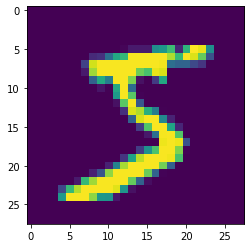

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

### Reshaping the data

In [7]:
x_train = x_train.reshape(60000, 28, 28, 1).astype('float32')
x_test = x_test.reshape(10000, 28, 28, 1).astype('float32')
x_train[0]

array([[[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
    

### One Hot Encoding

In [8]:
number_of_classes = 10
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test, number_of_classes)

In [9]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Model Building

### Adding CNN 

In [10]:
model = Sequential()

In [11]:
model.add(Conv2D(32, (3,3),input_shape=(28, 28, 1), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(Conv2D(64,(3,3), activation = 'relu'))

In [13]:
model.add(Conv2D(32,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [14]:
model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 32)          18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                    

### Compiling the Model

In [16]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

### Train the model

In [28]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 5, batch_size = 120)

Epoch 1/5
500/500 [==============================] - 59s 119ms/step - loss: 1.7115e-05 - accuracy: 1.0000 - val_loss: 0.0452 - val_accuracy: 0.9928
Epoch 2/5
500/500 [==============================] - 59s 118ms/step - loss: 1.2150e-05 - accuracy: 1.0000 - val_loss: 0.0460 - val_accuracy: 0.9928
Epoch 3/5
500/500 [==============================] - 60s 120ms/step - loss: 8.7419e-06 - accuracy: 1.0000 - val_loss: 0.0473 - val_accuracy: 0.9929
Epoch 4/5
500/500 [==============================] - 60s 118ms/step - loss: 6.4130e-06 - accuracy: 1.0000 - val_loss: 0.0486 - val_accuracy: 0.9929
Epoch 5/5
500/500 [==============================] - 54s 107ms/step - loss: 4.7056e-06 - accuracy: 1.0000 - val_loss: 0.0493 - val_accuracy: 0.9929


### Testing the Model

In [29]:
prediction = model.predict(x_test[:4])
prediction

1/1 [==============================] - 0s 42ms/step


array([[1.8287342e-27, 8.3896769e-24, 3.6652993e-19, 1.0962957e-17,
        1.7546592e-23, 1.5805427e-21, 0.0000000e+00, 1.0000000e+00,
        1.1164124e-27, 3.3271636e-18],
       [4.1992897e-19, 5.8508421e-24, 1.0000000e+00, 5.6514113e-33,
        4.3297628e-27, 0.0000000e+00, 4.2838602e-27, 2.3701137e-30,
        7.6712760e-23, 1.4349982e-31],
       [7.6338922e-20, 1.0000000e+00, 9.6164095e-20, 6.5535646e-29,
        1.6917137e-14, 5.6763004e-26, 5.1262502e-19, 9.3545080e-16,
        3.3185281e-20, 3.3474004e-21],
       [1.0000000e+00, 0.0000000e+00, 4.5244350e-19, 7.2867359e-33,
        3.2247756e-24, 7.7086332e-27, 6.8676443e-18, 6.4030430e-30,
        1.8547087e-18, 2.5519871e-19]], dtype=float32)

In [30]:
np.argmax(prediction, axis=1)

array([7, 2, 1, 0], dtype=int64)

### Observing the metrics

In [31]:
metrics = model.evaluate(x_test, y_test, verbose=0)
print('METRICS\n Loss: {:0.3f}\n Accuracy: {:0.3f}'.format(metrics[0],metrics[1]))

METRICS
 Loss: 0.049
 Accuracy: 0.993


### Saving the model

In [32]:
model.save('models/IBM_mnistCNN.h5')